A1: intraclass & interclass spread results: {'mean of class 0': array([4298.40255177, 4013.0837556 , 4262.46292237, 4200.39138791,
       4341.75263292, 4664.72600097, 4140.38739009, 4615.39349279,
       4200.36718057, 4229.69502604, 4200.26482621, 4277.43478261,
       4600.89988212, 4456.56728594]), 'mean of class 1': array([4350.79851703, 4005.69499926, 4265.93777927, 4121.41369627,
       4341.72688086, 4618.59477168, 4073.57068422, 4616.87168675,
       4241.49796371, 4233.30727949, 4205.14914324, 4281.4410174 ,
       4632.77489216, 4367.14750707]), 'intra_class0': np.float64(1829.0729020755073), 'intra_class1': np.float64(644.7344600517147), 'inter_class': np.float64(162.4833493284075)}
A2: mean & variance of Feature[0]: {'mean': np.float64(4321.917777036048), 'variance': np.float64(6210009.140723552)}


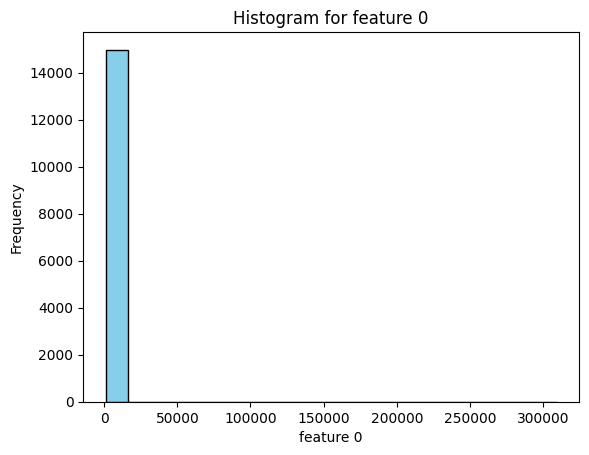

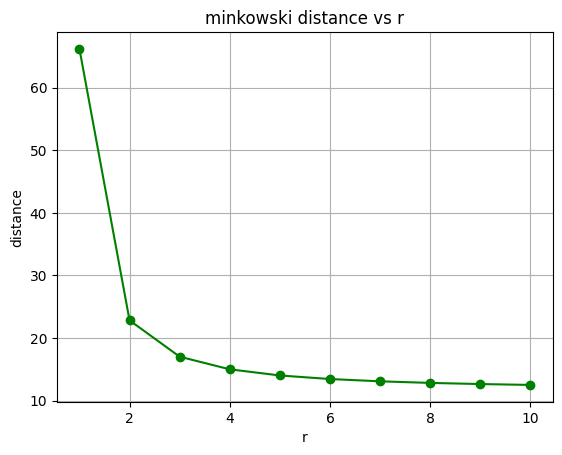

A3: minkowski distances (r=1 to 10): [np.float64(66.17000000000053), np.float64(22.825799000254058), np.float64(17.024892367299234), np.float64(15.007492764617185), np.float64(14.026936037672867), np.float64(13.458669481387519), np.float64(13.092358578686351), np.float64(12.839170763881336), np.float64(12.655407239828165), np.float64(12.517101493668104)]
A4: train size: 10486, test size: 4494
A5 trained k-NN with k = 3
A6 accuracy (k=3) -> Train: 0.9895, Test: 0.9722
A7) first 5 predictions: [1 0 0 0 1]
    ground truth:       [1 0 0 0 1]
A8) accuracies for k = 1..11
   k= 1 -> Train Acc=1.0000, Test Acc=0.9731
   k= 2 -> Train Acc=0.9864, Test Acc=0.9619
   k= 3 -> Train Acc=0.9895, Test Acc=0.9722
   k= 4 -> Train Acc=0.9806, Test Acc=0.9622
   k= 5 -> Train Acc=0.9815, Test Acc=0.9646
   k= 6 -> Train Acc=0.9726, Test Acc=0.9571
   k= 7 -> Train Acc=0.9722, Test Acc=0.9628
   k= 8 -> Train Acc=0.9656, Test Acc=0.9533
   k= 9 -> Train Acc=0.9659, Test Acc=0.9568
   k=10 -> Train Acc=

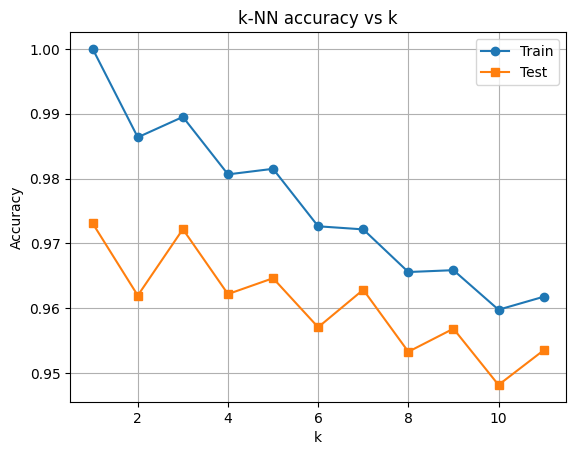


A9) --- Training Metrics (k=3) ---
Confusion Matrix (Train):
 [[5818   53]
 [  57 4558]]
precision per class (Train): [0.99029787 0.98850575]
recall per class (Train):    [0.99097258 0.98764897]
F1 per class (Train):        [0.99063511 0.98807717]
Accuracy (Train):            0.989509822620637

A9) Test metrics (k=3) 
confusion Matrix (Test):
 [[2340   46]
 [  79 2029]]
Precision per class (Test): [0.96734188 0.97783133]
Recall per class (Test):    [0.98072087 0.96252372]
F1 per class (Test):        [0.97398543 0.97011714]
Accuracy (Test):            0.9721851357365376

Model fit assessment (k=3): Regular fit


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

# A1( intaclass spread means how far the points of the same class spread)
#(interclass measures how the centroids of two different class are far apart)

def compute_class_centroid(X_class: np.ndarray) -> np.ndarray:


    return np.mean(X_class, axis=0)

def compute_intraclass_spread(X_class: np.ndarray) -> float:
  #meansuring how spread out the datatpoints of a class are
    return np.mean(np.std(X_class, axis=0))
    #finding  the averages of these standardd deviation to give one scalar value for the class

def compute_interclass_distance(centroid1: np.ndarray, centroid2: np.ndarray) -> float:
  #measuring distance i.e how far the two classes mean are
    return np.linalg.norm(centroid1 - centroid2)

def evaluate_spreads(X: np.ndarray, y: np.ndarray, class_labels: list) -> dict:
    #evaluvating means and intraclass and interclass distance
    class0_data = X[y == class_labels[0]]
    class1_data = X[y == class_labels[1]]

    mean0 = compute_class_centroid(class0_data)
    mean1 = compute_class_centroid(class1_data)

    return {
        "mean of class 0": mean0,
        "mean of class 1": mean1,
        "intra_class0": compute_intraclass_spread(class0_data),
        "intra_class1": compute_intraclass_spread(class1_data),
        "inter_class": compute_interclass_distance(mean0, mean1)
    }

# A2

def plot_feature_histogram(feature_values: np.ndarray, feature_name: str):
#ploting the  histogram of a single feature for density visualization
    plt.hist(feature_values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

def compute_feature_statistics(feature_values: np.ndarray) -> dict:
    #computing the mean and variance
    return {"mean": np.mean(feature_values), "variance": np.var(feature_values)}

# A3

def minkowski_distance(vec1: np.ndarray, vec2: np.ndarray, r: float) -> float:
#calculating minkowski distance of order r between two vectors
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r)

def plot_minkowski_distances(vec1: np.ndarray, vec2: np.ndarray):
#plotting the minkowski distance  for r=1 to 10."""
    r_values = np.arange(1, 11)
    distances = [minkowski_distance(vec1, vec2, r) for r in r_values]
    plt.plot(r_values, distances, marker='o', color='green')
    plt.title("minkowski distance vs r")
    plt.xlabel("r")
    plt.ylabel("distance")
    plt.grid(True)
    plt.show()
    return distances

# A4: Train-Test Split
def split_train_test(X: np.ndarray, y: np.ndarray, test_ratio: float = 0.3):

    return train_test_split(X, y, test_size=test_ratio, random_state=42)

# A5: kNN classifier
def train_knn_classifier(X_train, y_train, k=3):


    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate_accuracy(model, X, y):

    return model.score(X, y)

def predict_labels(model, X):
    #it returns prediction for given feature matrix X
    return model.predict(X)

# A6
def evaluate_knn_accuracy(model, X_train, y_train, X_test, y_test):

    return {
        "train_accuracy": evaluate_accuracy(model, X_train, y_train),
        "test_accuracy": evaluate_accuracy(model, X_test, y_test)
    }

# A7

def get_knn_predictions(model, X_test):


    return predict_labels(model, X_test)


# A8
def sweep_k_accuracies(X_train, y_train, X_test, y_test, k_values):
#training kn n for each k in k_values and collecting the accuracies
    train_acc, test_acc = [], []
    for k in k_values:
        clf = train_knn_classifier(X_train, y_train, k=k)
        train_acc.append(evaluate_accuracy(clf, X_train, y_train))
        test_acc.append(evaluate_accuracy(clf, X_test, y_test))
    return list(k_values), train_acc, test_acc

def plot_accuracy_vs_k(k_values, train_acc, test_acc):
    plt.figure()
    plt.plot(k_values, train_acc, marker='o', label='Train')
    plt.plot(k_values, test_acc, marker='s', label='Test')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k-NN accuracy vs k')
    plt.grid(True)
    plt.legend()
    plt.show()


# A9

def compute_confusion_and_prf(y_true, y_pred):
#calculating the confusion matrix,precision,recall,fl score,accuracy
    cm = confusion_matrix(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    acc = accuracy_score(y_true, y_pred)
    return {
        "confusion_matrix": cm,
        "precision_per_class": precision,
        "recall_per_class": recall,
        "f1_per_class": f1,
        "accuracy": acc
    }

def assess_fit_quality(train_acc, test_acc, gap_threshold=0.1, low_threshold=0.7):
    if train_acc - test_acc > gap_threshold:
        return "Overfit"
    if train_acc < low_threshold and test_acc < low_threshold:
        return "Underfit"
    return "Regular fit"

if __name__ == "__main__":

    df = pd.read_csv("/content/EEG_Eye_State_Classification.csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # A1
    class_labels = np.unique(y)[:2]
    spread_results = evaluate_spreads(X, y, class_labels)
    print("A1: intraclass & interclass spread results:", spread_results)

    # A2
    feature_index = 0
    feature_stats = compute_feature_statistics(X[:, feature_index])
    print(f"A2: mean & variance of Feature[{feature_index}]:", feature_stats)
    plot_feature_histogram(X[:, feature_index], f"feature {feature_index}")

    # A3
    vec1, vec2 = X[0], X[1]
    minkowski_distances = plot_minkowski_distances(vec1, vec2)
    print("A3: minkowski distances (r=1 to 10):", minkowski_distances)

    # A4
    X_train, X_test, y_train, y_test = split_train_test(X, y, test_ratio=0.3)
    print(f"A4: train size: {len(X_train)}, test size: {len(X_test)}")

    # A5
    k_fixed = 3
    knn_k3 = train_knn_classifier(X_train, y_train, k=k_fixed)
    print(f"A5 trained k-NN with k = {k_fixed}")

    # A6
    acc_results = evaluate_knn_accuracy(knn_k3, X_train, y_train, X_test, y_test)
    print(f"A6 accuracy (k={k_fixed}) -> Train: {acc_results['train_accuracy']:.4f}, Test: {acc_results['test_accuracy']:.4f}")

    # A7
    y_test_pred = get_knn_predictions(knn_k3, X_test)
    print(f"A7) first 5 predictions: {y_test_pred[:5]}")
    print(f"    ground truth:       {y_test[:5]}")

    # A8
    k_vals, train_accs, test_accs = sweep_k_accuracies(X_train, y_train, X_test, y_test, range(1, 12))
    print("A8) accuracies for k = 1..11")
    for k, ta, va in zip(k_vals, train_accs, test_accs):
        print(f"   k={k:2d} -> Train Acc={ta:.4f}, Test Acc={va:.4f}")
    plot_accuracy_vs_k(k_vals, train_accs, test_accs)

    # A9
    train_metrics = compute_confusion_and_prf(y_train, predict_labels(knn_k3, X_train))
    test_metrics = compute_confusion_and_prf(y_test, y_test_pred)
    print("\nA9) --- Training Metrics (k=3) ---")
    print("Confusion Matrix (Train):\n", train_metrics["confusion_matrix"])
    print("precision per class (Train):", train_metrics["precision_per_class"])
    print("recall per class (Train):   ", train_metrics["recall_per_class"])
    print("F1 per class (Train):       ", train_metrics["f1_per_class"])
    print("Accuracy (Train):           ", train_metrics["accuracy"])

    print("\nA9) Test metrics (k=3) ")
    print("confusion Matrix (Test):\n", test_metrics["confusion_matrix"])
    print("Precision per class (Test):", test_metrics["precision_per_class"])
    print("Recall per class (Test):   ", test_metrics["recall_per_class"])
    print("F1 per class (Test):       ", test_metrics["f1_per_class"])
    print("Accuracy (Test):           ", test_metrics["accuracy"])

    fit_quality = assess_fit_quality(acc_results['train_accuracy'], acc_results['test_accuracy'])
    print(f"\nModel fit assessment (k=3): {fit_quality}")